In [2]:
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

eps = 1e-10  # A negligible positive number
np.random.seed(0)


In [1]:
%cd /tmp/pycharm_project_300
from src.data.data import TPPWrapper
from src.visualization.visualize import plot_temporal
from src.utils import get_device

device = get_device()


/tmp/pycharm_project_300


In [3]:
def relu(x):
    return x * (x > 0)

def lamb_func(t, his_t):
    mu1 = .4
    mu2 = 1e-5

    zeta = 1.
    c0 = -1.
    c1 = 1.
    c2 = .2

    delta_t = t - his_t[his_t < t]

    lamb_t = relu(mu1 + np.sum((c2 * delta_t ** 2 + c1 * delta_t + c0) * np.exp(-zeta * delta_t))) + mu2
    L = 2 / lamb_t

    count = delta_t[0::2]
    count = sum(count[count < 10])

    M = mu1 + mu2 + count * 0.677

    return (lamb_t, L, M)

dataset = TPPWrapper(lamb_func, n_sample=1, t_end=5000.0, max_lamb=100, verbose=True)
# dataset.save('data/temporal/correctingHawkes')


  0%|          | 0/1 [00:00<?, ?it/s]

Generating events from t=0 to t=5000.0
----
t:  1.9896365294945373
λt: 0.40001000000000003
----
t:  4.297636694000596
λt: 0.6360655865712656
----
t:  6.993944687261339
λt: 0.6729797758980435
----
t:  9.570943238175692
λt: 0.6804458875500313
----
t:  12.381084065140177
λt: 0.6578434042712905
----
t:  13.507871557289702
λt: 0.6648002096742887
----
t:  13.824722948898751
λt: 0.23639520618799287
----
t:  17.155386500533712
λt: 0.7818943080079078
----
t:  18.42339086166546
λt: 0.7419802510356742
----
t:  18.859966029072783
λt: 0.42530292411681253
----
t:  19.83558945919134
λt: 0.9390038899221131
----
t:  21.1391859350383
λt: 1.1619804908726186
----
t:  22.944983567525483
λt: 1.051706211265905
----
t:  24.238776345665002
λt: 0.9395984648964174
----
t:  24.47439200277939
λt: 0.34191763845917317
----
t:  25.607031554984278
λt: 1.0858327641470447
----
t:  25.95786343001972
λt: 0.7156846560082396
----
t:  27.770891656436827
λt: 1.2940478759059948
----
t:  27.796174400227216
λt: 0.338354400776997

```
close, 0.08
2022-05-07 11:32:38,513 - root - INFO - CorrectingMLE : 269 - mu    : 0.4249
2022-05-07 11:32:38,513 - root - INFO - CorrectingMLE : 270 - zeta  : 1.2641
2022-05-07 11:32:38,513 - root - INFO - CorrectingMLE : 271 - c0    : -0.9678
2022-05-07 11:32:38,513 - root - INFO - CorrectingMLE : 272 - c1    : 0.3320
2022-05-07 11:32:38,513 - root - INFO - CorrectingMLE : 273 - c2    : 0.9472
```

In [18]:
def lamb_close(t, his_t):
    mu1 = 0.4249
    mu2 = 1e-5

    zeta = 1.2641
    c0 = -0.9678
    c1 = 0.3320
    c2 = 0.9472

    delta_t = t - his_t[his_t < t]

    lamb_t = relu(mu1 + np.sum((c2 * delta_t ** 2 + c1 * delta_t + c0) * np.exp(-zeta * delta_t))) + mu2
    L = 2 / lamb_t

    count = delta_t[0::2]
    count = sum(count[count < 10])

    M = mu1 + mu2 + count * 0.677

    return lamb_t, L, M

```
numroot, 0.08
2022-05-07 13:28:21,811 - root - INFO - CorrectingMLE : 269 - mu    : 0.4232
2022-05-07 13:28:21,811 - root - INFO - CorrectingMLE : 270 - zeta  : 1.2593
2022-05-07 13:28:21,811 - root - INFO - CorrectingMLE : 271 - c0    : -0.9716
2022-05-07 13:28:21,812 - root - INFO - CorrectingMLE : 272 - c1    : 0.3480
2022-05-07 13:28:21,812 - root - INFO - CorrectingMLE : 273 - c2    : 0.9339
```

In [23]:
def lamb_numroot(t, his_t):
    mu1 = 0.4232
    mu2 = 1e-5

    zeta = 1.2593
    c0 = -0.9716
    c1 = 0.3480
    c2 = 0.9339

    delta_t = t - his_t[his_t < t]

    lamb_t = relu(mu1 + np.sum((c2 * delta_t ** 2 + c1 * delta_t + c0) * np.exp(-zeta * delta_t))) + mu2
    L = 2 / lamb_t

    count = delta_t[0::2]
    count = sum(count[count < 10])

    M = mu1 + mu2 + count * 0.677

    return lamb_t, L, M

In [30]:
his_t = dataset.seqs[0].numpy()
t_start = 0.
t_end = 30.
lambs = {'x': eps + t_start + np.arange(1001) / 1000 * (t_end - t_start)}
lambs['GT'] = [lamb_func(t, his_t)[0] for t in lambs['x']]
lambs['learned λ(t), numerical'] = [lamb_numroot(t, his_t)[0] for t in lambs['x']]
lambs['learned λ(t), close'] = [lamb_close(t, his_t)[0] for t in lambs['x']]
colors = {'learned λ(t), close': 'red'}

In [31]:
idx = np.logical_and(his_t >= t_start, his_t < t_end)
events = his_t[idx]

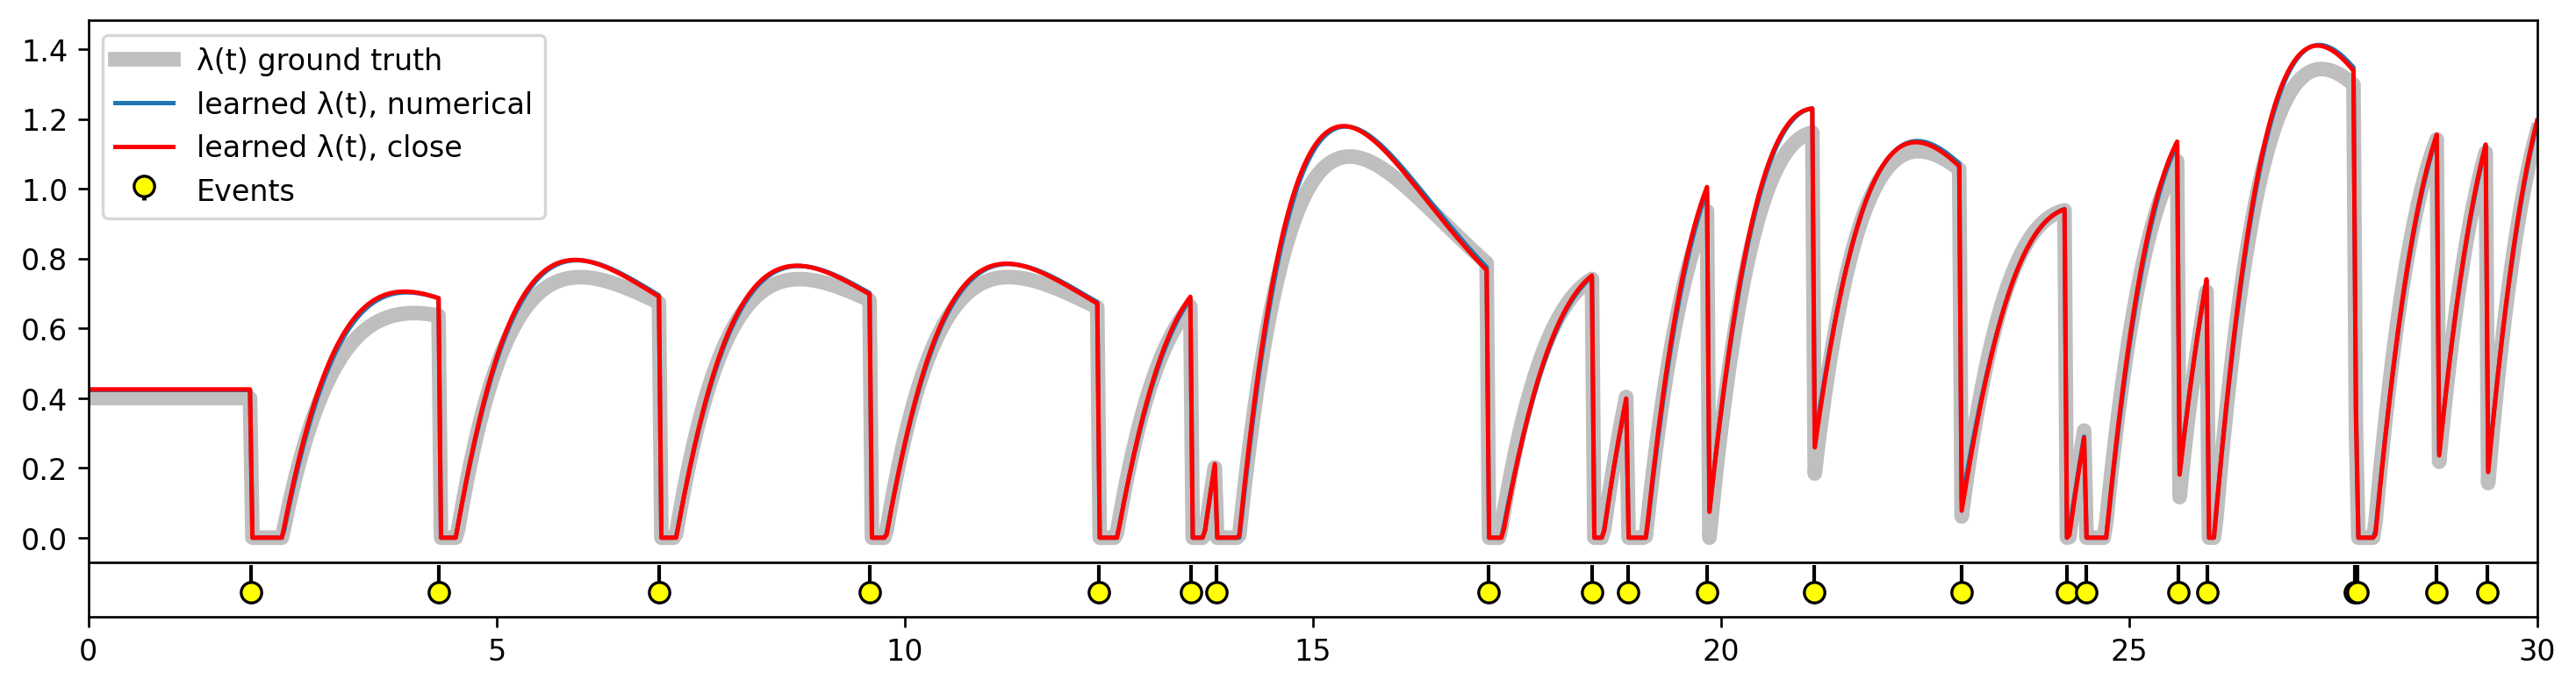

In [33]:
fig = plot_temporal(lambs, events, colors, width=15)